# Project Akhir Backpropagation (Crop Dataset)
Jaringan Saraf Tiruan - F <br>
Anggota Kelompok 6 :
1. Muhammad Basil Musyaffa Amin 		(215150201111023)
2. Muhammad Fajrul Alwan				(215150207111023)
3. Gibran Hakim 						(215150200111020)
4. Saif Daffa Adinata (215150200111059)

#Data Collection & Data Understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
! wget https://raw.githubusercontent.com/pinnoxh/crop-classification/refs/heads/main/Crop_recommendation.csv

--2025-03-15 04:01:49--  https://raw.githubusercontent.com/pinnoxh/crop-classification/refs/heads/main/Crop_recommendation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147833 (144K) [text/plain]
Saving to: ‘Crop_recommendation.csv’

Crop_recommendation 100%[===================>] 144.37K  --.-KB/s    in 0.03s   

2025-03-15 04:01:50 (4.41 MB/s) - ‘Crop_recommendation.csv’ saved [147833/147833]



In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

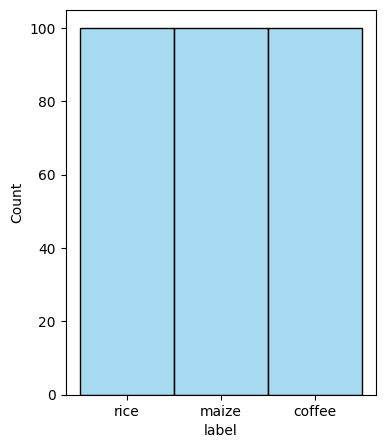

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4, 5))
sns.histplot(data=df, x='label', ax=axes, color='skyblue')
plt.show()

# Data Preparation

Pengambilan 3 kelas dari dataframe

In [ ]:
df = df = df[df['label'].isin(['rice', 'coffee', 'maize'])]
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Normalisasi MinMax

In [ ]:
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return df_input

In [ ]:
df_scaled = minmax(df)
df_scaled

<ipython-input-8-a0853e29a377>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[fitur] = (df_input[fitur]-min)/(max-min)


,N,P,K,temperature,humidity,ph,rainfall,label
0,0.500000,0.600000,0.933333,0.287181,0.915062,0.523084,0.598061,rice
1,0.416667,0.955556,0.866667,0.377317,0.866868,0.709979,0.697764,rice
2,0.000000,0.888889,0.966667,0.502192,0.924168,0.990127,0.854583,rice
3,0.233333,0.444444,0.833333,0.855023,0.862250,0.689828,0.765893,rice
4,0.300000,0.600000,0.900000,0.211328,0.903669,0.916176,0.849342,rice
...,...,...,...,...,...,...,...,...
2195,0.783333,0.422222,0.566667,0.883716,0.468673,0.619858,0.492302,coffee
2196,0.650000,0.000000,0.400000,0.948731,0.188721,0.377769,0.282768,coffee
2197,0.966667,0.400000,0.500000,0.616273,0.491920,0.474056,0.473590,coffee
2198,0.950000,0.377778,0.633333,0.832894,0.059611,0.612429,0.279618,coffee


In [ ]:
df_scaled.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.438056,0.590815,0.495556,0.590084,0.535439,0.517498,0.416210
std,0.267267,0.265166,0.291848,0.251329,0.313755,0.209917,0.282689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.438889,0.233333,0.428362,0.270742,0.362584,0.167375
50%,0.433333,0.577778,0.500000,0.626633,0.487741,0.522091,0.408221
75%,0.633333,0.822222,0.766667,0.780979,0.883732,0.676020,0.600021
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Mengacak baris dalam dataframe

In [ ]:
df_scaled = df_scaled.sample(frac=1).reset_index(drop=True)

Mengambil kolom yang bukan target, dan mengubahnya dalam bentuk array agar bisa diproses ke langkah selanjutnya

In [ ]:
X = df_scaled[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
X = np.array(X)
X[:8]

array([[0.4       , 0.8       , 0.66666667, 0.43106323, 0.87616056,
        0.3625348 , 0.57722806],
       [0.25      , 0.84444444, 0.1       , 0.26787833, 0.26892961,
        0.64945083, 0.18074067],
       [0.1       , 1.        , 0.76666667, 0.40922443, 0.95708654,
        0.4775373 , 0.71912038],
       [0.46666667, 0.44444444, 0.66666667, 0.96309616, 0.24086528,
        0.62139344, 0.24079555],
       [0.13333333, 0.93333333, 0.93333333, 0.81430012, 0.86859072,
        0.24505595, 0.5138643 ],
       [0.56666667, 0.53333333, 0.1       , 0.59192027, 0.2130997 ,
        0.31007131, 0.17728873],
       [0.06666667, 0.44444444, 0.26666667, 0.50380328, 0.33928872,
        0.23577175, 0.01003209],
       [0.45      , 0.86666667, 0.16666667, 0.76657594, 0.38442896,
        0.54873183, 0.20250929]])

# One-Hot Encoding

One-hot encoding adalah suatu metode yang digunakan untuk menggambarkan data kategorikal atau nilai kelas dalam bentuk vektor biner. Tujuannya adalah untuk memberikan representasi numerik yang sesuai dengan nilai kelas atau kategori tanpa memberikan arti atau urutan numerik yang salah.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

Y = df_scaled.label
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[:3]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Menentukan Data Latih, Data Uji dan Data Validasi

Dataframe yang awalnya memiliki 300 data, dipecah menjadi data latih dan data sisa dengan perbandingan 80:20. Data yang tersisa dipecah kembali menjadi data uji dan data validasi dengan perbandingan 80:20

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.8, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(X_val))
print(len(Y_train))
print(len(Y_test))
print(len(Y_val))

240
48
12
240
48
12


# Implementasi Backpropagation

Fungsi utama `NeuralNetwork` akan melatih jaringan untuk jumlah epoch yang ditentukan. Pada awalnya, bobot jaringan akan diinisialisasi secara acak dengan `InitializeWeights`. Kemudian, di setiap epoch, bobot akan diperbarui dengan `Train` dan setiap 20 epoch nilai loss baik untuk set pelatihan maupun validasi akan dicetak oleh fungsi `Loss`. Di akhir pelatihan, akan dicetak grafik kurva pembelajaran model oleh fungsi  ` PlotLearningCurve` Sebagai input, fungsi menerima yang berikut:

* `X_train`, `Y_train`: Data pelatihan dan nilai target.
* `X_val`, `Y_val`: Data validasi dan nilai target
* `epochs`: Jumlah epoch. Defaultnya di 10.
* `node`: Daftar neuron pada setiap layers. Setiap bilangan bulat menunjukkan jumlah neuron di setiap lapisan. Panjang daftar ini menunjukkan jumlah lapisan. Artinya, setiap bilangan bulat dalam daftar ini sesuai dengan jumlah node di setiap lapisan.
* `lr`: Kecepatan pembelajaran algoritma pelatihan backpropagation. Defaultnya adalah 0,15.

In [ ]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)

    train_losses, val_losses = [], []

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if epoch % 20 == 0:
            print("Epoch {}".format(epoch))
            train_loss = Loss(X_train, Y_train, weights)
            train_losses.append(train_loss)
            print("Training Loss: {}".format(train_loss))

            if X_val is not None:
                val_loss = Loss(X_val, Y_val, weights)
                val_losses.append(val_loss)
                print("Validation Loss: {}".format(val_loss))

    PlotLearningCurve(train_losses, val_losses)
    return weights

def PlotLearningCurve(train_losses, val_losses):
    epochs = range(20, len(train_losses)*20 + 1, 20)

    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def Loss(X, Y, weights):
    loss = 0
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.append(1, x)  # Augment feature vector
        activations = ForwardPropagation(x, weights, len(weights))
        output = activations[-1].A1
        loss += np.sum((y - output) ** 2) / 2

    return loss / len(X)

# Inisialisasi Bobot

Inisialisasi bobot adalah langkah awal di mana nilai-nilai bobot antara neuron-neuron dalam jaringan saraf diatur dengan nilai awal tertentu sebelum proses pelatihan dimulai. Inisialisasi bobot yang baik dapat mempengaruhi kinerja jaringan secara keseluruhan.

In [ ]:
def InitializeWeights(nodes):
    """Initialize weights with random values in [-1, 1] (including bias)"""
    layers, weights = len(nodes), []

    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))

    return weights

# Fungsi Aktivasi (Sigmoid dan turunannya)

In [ ]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

# Feed Forward

* Setiap lapisan menerima input dan menghitung output. Keluarannya dihitung dengan perkalian dot antara data input dan bobot pada hidden layer, lalu meneruskan perkalian dot ini melalui fungsi aktivasi (dalam hal ini, fungsi sigmoid).
* Output dari setiap lapisan adalah input pada lapisan berikutnya.
* Masukan input pertama adalah vektor fitur. Pada dataset Crop ada 7 fitur yang digunakan

In [ ]:
def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation)

    return activations

#Backward Propagation:

* Hitung error yang dihasilkan dari Feed Forward
* Hitung error per layer dengan cara:
    * Menghitung Delta menggunakan turunan fungsi Sigmoid yang dikalikan dengan error yang telah dihitung
    * Update bobot pada layer sekarang dengan mengkalikan delta dengan input dari layer sebelumnya (hasil dari fungsi aktivasi) dan learning rate
    * Update error pada layer yang sekarang dengan delta dan bobot yang baru.

In [ ]:
def BackPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal) # Error at output

    for j in range(layers, 0, -1):
        currActivation = activations[j]

        if(j > 1):
            # Augment previous activation
            prevActivation = np.append(1, activations[j-1])
        else:
            # First hidden layer, prevActivation is input (without bias)
            prevActivation = activations[0]

        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1)
        error = np.dot(delta, w) # Calculate error for current layer

    return weights

# Fungsi Pelatihan, Prediksi dan Perhitungan Akurasi

In [ ]:
def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x)) # Augment feature vector

        activations = ForwardPropagation(x, weights, layers)
        weights = BackPropagation(y, activations, weights, layers)

    return weights

In [ ]:
def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item) # Augment feature vector

    ##_Forward Propagation_##
    activations = ForwardPropagation(item, weights, layers)

    outputFinal = activations[-1].A1
    index = np.argmax(outputFinal)

    # Initialize prediction vector to zeros
    y = [0 for i in range(len(outputFinal))]
    y[index] = 1  # Set guessed class to 1

    return y # Return prediction vector

In [ ]:
def Accuracy(X, Y, weights):
    """Run set through network, find overall accuracy"""
    correct = 0

    for i in range(len(X)):
        x, y = X[i], np.array(Y[i])  # Convert y to numpy array
        guess = Predict(x, weights)

        # Find the index with the maximum probability
        predicted_class = np.argmax(guess)
        true_class = np.argmax(y)

        if predicted_class == true_class:
            # Guessed correctly
            correct += 1

    return correct / len(X)

# Proses Pelatihan

Epoch 20
Training Loss: 0.020091788371025647
Validation Loss: 0.01965173863424581
Epoch 40
Training Loss: 0.00785232570669519
Validation Loss: 0.007619208040750402
Epoch 60
Training Loss: 0.004749588293032615
Validation Loss: 0.004606166348747479
Epoch 80
Training Loss: 0.003361884355595888
Validation Loss: 0.0032671143428542973
Epoch 100
Training Loss: 0.002582817138675966
Validation Loss: 0.0025184030313453874


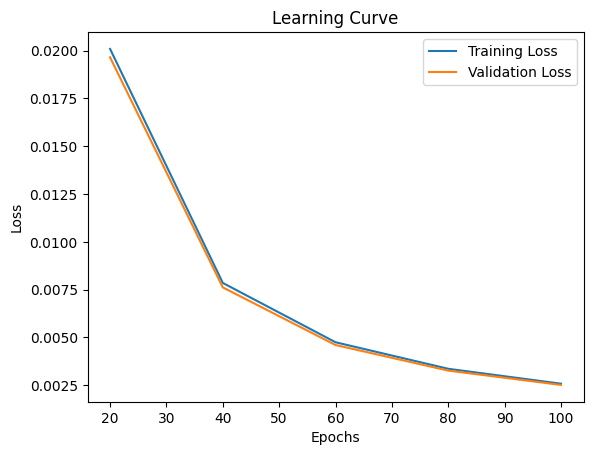

In [ ]:
f = len(X[0]) # Number of features
o = len(Y[0]) # Number of outputs / classes

layers = [f, 3, o] # Number of nodes in layers
lr, epochs = 0.15, 100

weights = NeuralNetwork(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=layers, lr=lr);

In [ ]:
print("Testing Accuracy in Train Data: {}".format(Accuracy(X_train, Y_train, weights)))

Testing Accuracy in Train Data: 1.0


In [ ]:
print("Testing Accuracy in Testing Data: {}".format(Accuracy(X_test, Y_test, weights)))

Testing Accuracy in Testing Data: 1.0


# Laporan Klasifikasi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = 'rice', 'maize', 'coffee'

In [ ]:
predictions = [Predict(x, weights) for x in X_test]

In [ ]:
print(classification_report(Y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        12
      coffee       1.00      1.00      1.00        19

   micro avg       1.00      1.00      1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48
 samples avg       1.00      1.00      1.00        48



#Kesimpulan

Pembuatan *artificial neural network* menggunakan metode Backpropagation menggunakan dataset Crop Recommendation memerlukan beberapa langkah, seperti Data Understanding, Data Preparation, Implementasi Neural Network menggunakan Feedforward dan Backpropagation, serta Training dengan menggunakan 240 data.

Hasil dari training menunjukkan bahwa tidak adanya underfitting maupun overfitting dengan kurva pembelajaran yang normal. Akurasi prediksi data mencapai 1.0 dengan menggunakan data test sebanyak 48 data